In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


In [41]:
df = pd.read_csv('processed.cleveland.data',names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df = df.drop(df.loc[df['thal']=='?'].index)
df = df.drop(df.loc[df['ca']=='?'].index)
df = df.apply(pd.to_numeric)
y = df['num']
df = df.drop(columns=['num'])
print(np.transpose(y.to_numpy()))
df.describe()


[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

y = y.replace([2,3,4],1)

clf = LogisticRegression(random_state=0, solver='newton-cg')
clf = clf.fit(df,y)
pred = clf.predict(df)
acc  = accuracy_score(y, pred)
prec = precision_score(y, pred)
rec  = recall_score(y, pred)
print('acc=%.2f, prec=%.2f, rec=%.2f'%(acc,prec,rec))

print(confusion_matrix(y,pred))
print()

limiar = 0.3
pred_proba = clf.predict_proba(df)
pred_proba = (pred_proba[:,1]>limiar)*1
acc  = accuracy_score(y, pred_proba)
prec = precision_score(y, pred_proba)
rec  = recall_score(y, pred_proba)
print('limiar=%.2f acc=%.2f, prec=%.2f, rec=%.2f'%(limiar, acc,prec,rec))
print(confusion_matrix(y,pred_proba))

acc=0.85, prec=0.86, rec=0.81
[[142  18]
 [ 26 111]]

limiar=0.30 acc=0.82, prec=0.77, rec=0.87
[[125  35]
 [ 18 119]]


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.20, random_state=40)
X_train, X_vali, y_train, y_vali = train_test_split(X_train,y_train, test_size=0.25, random_state=40)

clf_lr  = LogisticRegression(solver='newton-cg').fit(X_train,y_train)
clf_lda = LinearDiscriminantAnalysis().fit(X_train,y_train) 
clf_qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train) 
clf_knn = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)

print("LR")
evaluate_model(clf_lr,  X_vali, y_vali)
print("LDA")
evaluate_model(clf_lda, X_vali, y_vali)
print("QDA")
evaluate_model(clf_qda, X_vali, y_vali)
print("kNN")
evaluate_model(clf_knn, X_vali, y_vali)

LR
limiar=0.50 acc=0.83, prec=0.77, rec=0.89
[[26  7]
 [ 3 24]]
LDA
limiar=0.50 acc=0.83, prec=0.77, rec=0.89
[[26  7]
 [ 3 24]]
QDA
limiar=0.50 acc=0.87, prec=0.85, rec=0.85
[[29  4]
 [ 4 23]]
kNN
limiar=0.50 acc=0.68, prec=0.70, rec=0.52
[[27  6]
 [13 14]]


In [14]:
def evaluate_model(clf, df, y,limiar=-1):

  if limiar >= 0:
    pred_proba = clf.predict_proba(df)
    pred       = (pred_proba[:,1]>limiar)*1
  else:
    pred = clf.predict(df)
    limiar = 0.5

    acc  = accuracy_score(y, pred)
    prec = precision_score(y, pred)
    rec  = recall_score(y, pred)
    print('limiar=%.2f acc=%.2f, prec=%.2f, rec=%.2f'%(limiar, acc,prec,rec))
    print(confusion_matrix(y,pred))

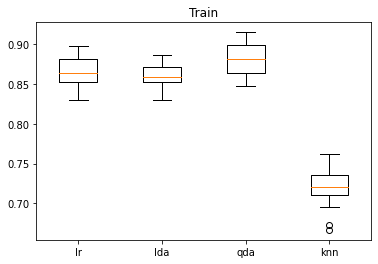

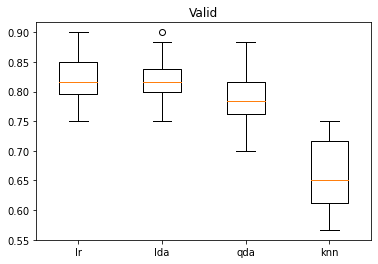

In [27]:
acc_lr =[]
acc_lda =[]
acc_qda =[]
acc_knn =[]

acc_lr_train =[]
acc_lda_train =[]
acc_qda_train =[]
acc_knn_train =[]

for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.20)
  X_train, X_vali, y_train, y_vali = train_test_split(X_train,y_train, test_size=0.25)

  clf_lr  = LogisticRegression(solver='newton-cg').fit(X_train,y_train)
  clf_lda = LinearDiscriminantAnalysis().fit(X_train,y_train) 
  clf_qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train) 
  clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

  acc_lr_train.append( accuracy_score(y_train, clf_lr.predict(X_train) ) )
  acc_lda_train.append(accuracy_score(y_train, clf_lda.predict(X_train)) )
  acc_qda_train.append(accuracy_score(y_train, clf_qda.predict(X_train)) )
  acc_knn_train.append(accuracy_score(y_train, clf_knn.predict(X_train)) )

  acc_lr.append( accuracy_score(y_vali, clf_lr.predict(X_vali) ) )
  acc_lda.append(accuracy_score(y_vali, clf_lda.predict(X_vali)) )
  acc_qda.append(accuracy_score(y_vali, clf_qda.predict(X_vali)) )
  acc_knn.append(accuracy_score(y_vali, clf_knn.predict(X_vali)) )

plt.boxplot([acc_lr_train, acc_lda_train, acc_qda_train, acc_knn_train],labels=['lr','lda','qda','knn']);
plt.title("Train")
plt.show()

plt.boxplot([acc_lr, acc_lda, acc_qda, acc_knn],labels=['lr','lda','qda','knn']);
plt.title("Valid")
plt.show()

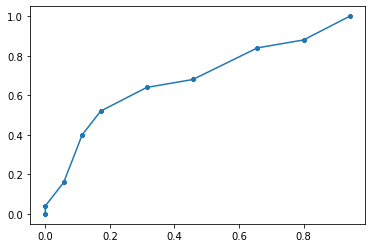

(array([0.        , 0.        , 0.05714286, 0.11428571, 0.17142857,
        0.31428571, 0.45714286, 0.65714286, 0.8       , 0.94285714,
        1.        ]),
 array([0.  , 0.04, 0.16, 0.4 , 0.52, 0.64, 0.68, 0.84, 0.88, 1.  , 1.  ]),
 array([1.9, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

In [40]:
tpr_list = [] 
fpr_list = [] 

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.20)
X_train, X_vali, y_train, y_vali = train_test_split(X_train,y_train, test_size=0.25)

clf_lr  = LogisticRegression(solver='newton-cg').fit(X_train,y_train)
clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
pred_proba = clf_knn.predict_proba(X_vali)

for i in range(0,101,1):
    limiar = i/100    
    pred       = (pred_proba[:,1]>limiar)*1
    conf = confusion_matrix(y_vali, pred)
    # TN FP
    # FN TP
    tpr_list.append( conf[1][1] / (conf[1][0]+conf[1][1]) )
    fpr_list.append( conf[0][1] / (conf[0][0]+conf[0][1]) )

plt.plot(fpr_list, tpr_list,".-")
plt.show()

roc_curve(y_vali, pred_proba[:,1])


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

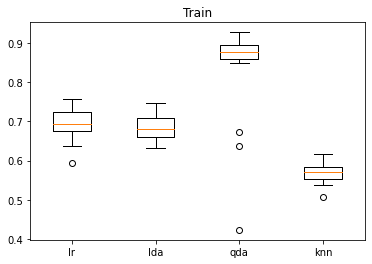

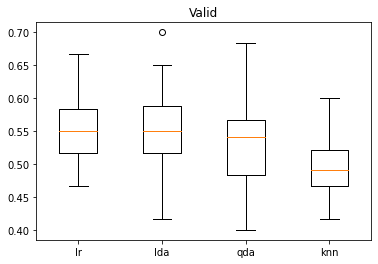

In [42]:
acc_lr =[]
acc_lda =[]
acc_qda =[]
acc_knn =[]

acc_lr_train =[]
acc_lda_train =[]
acc_qda_train =[]
acc_knn_train =[]

for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.20)
  X_train, X_vali, y_train, y_vali = train_test_split(X_train,y_train, test_size=0.25)

  clf_lr  = LogisticRegression(solver='newton-cg').fit(X_train,y_train)
  clf_lda = LinearDiscriminantAnalysis().fit(X_train,y_train) 
  clf_qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train) 
  clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

  acc_lr_train.append( accuracy_score(y_train, clf_lr.predict(X_train) ) )
  acc_lda_train.append(accuracy_score(y_train, clf_lda.predict(X_train)) )
  acc_qda_train.append(accuracy_score(y_train, clf_qda.predict(X_train)) )
  acc_knn_train.append(accuracy_score(y_train, clf_knn.predict(X_train)) )

  acc_lr.append( accuracy_score(y_vali, clf_lr.predict(X_vali) ) )
  acc_lda.append(accuracy_score(y_vali, clf_lda.predict(X_vali)) )
  acc_qda.append(accuracy_score(y_vali, clf_qda.predict(X_vali)) )
  acc_knn.append(accuracy_score(y_vali, clf_knn.predict(X_vali)) )

plt.boxplot([acc_lr_train, acc_lda_train, acc_qda_train, acc_knn_train],labels=['lr','lda','qda','knn']);
plt.title("Train")
plt.show()

plt.boxplot([acc_lr, acc_lda, acc_qda, acc_knn],labels=['lr','lda','qda','knn']);
plt.title("Valid")
plt.show()